In [1]:
import sys
stdout = sys.stdout

import os
sys.path.insert(1, os.path.join(os.path.abspath(''), 'DSTT-model-and-utils'))
from DSTT_model import DSTTModel
from DSTT_utils import load_training_and_testing_data

sys.stdout = stdout

In [2]:
columns_names  =['Scalar_B',  'BZ_GSE', 'SW_Plasma_Temperature',  'SW_Proton_Density','SW_Plasma_Speed', 
                 'Flow_pressure', 'E_electric_field']

In [3]:
model11 = DSTTModel()

X_train,y_train, X_test, y_test, X_valid, y_valid,x_dates = load_training_and_testing_data(num_hours = 2)

In [4]:
import pandas as pd
trainx_df = pd.DataFrame(X_train.reshape(X_train.shape[0],len(columns_names)), columns = columns_names)

trainy_df = pd.DataFrame(y_train, columns = ['Dst-index'])

df = pd.concat([trainx_df, trainy_df], axis=1)

print(df.shape)

df = df[df.SW_Plasma_Temperature != 9999999]
df = df[df.Scalar_B != 999.9]
df = df[df.Flow_pressure != 99.99]
df = df[df.E_electric_field != 999.99]

print(df.shape)

trainy_df = pd.DataFrame(df[df.columns[-1]], columns = ['Dst-index'])

y_train = trainy_df.to_numpy()

trainx_df = df.drop('Dst-index', axis=1)

X_train = trainx_df.to_numpy()

X_train = X_train.reshape(X_train.shape[0],1, len(columns_names))

(104079, 8)
(102853, 8)


In [5]:
#model11.set_data(X_train,y_train, X_train,y_train)

input_shape = (X_train.shape[1], X_train.shape[2])

model11.load_model(input_shape, kl_weight=1/X_train.shape[0], num_hours=2, w_dir='models')

In [6]:
# Implementing ALE
from alibi.explainers import ALE, plot_ale
ale = ALE(model11.predict, feature_names=columns_names, target_names=['Dst index'])
# Explanation on the train set 
ale_exp = ale.explain(X_train.reshape(X_train.shape[0],len(columns_names)))

1/1 [==============================] - 3s 3s/step


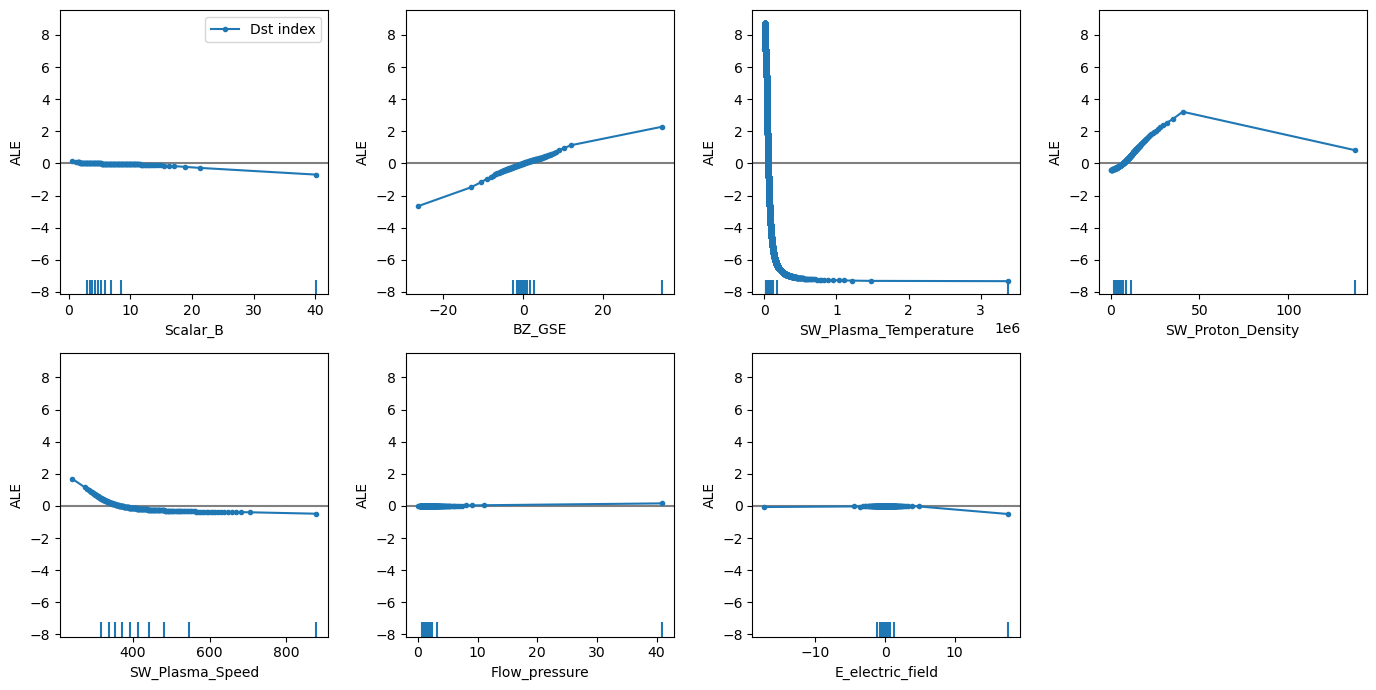

In [7]:
plot_ale(ale_exp, n_cols=4, fig_kw={'figwidth':14, 'figheight': 7});

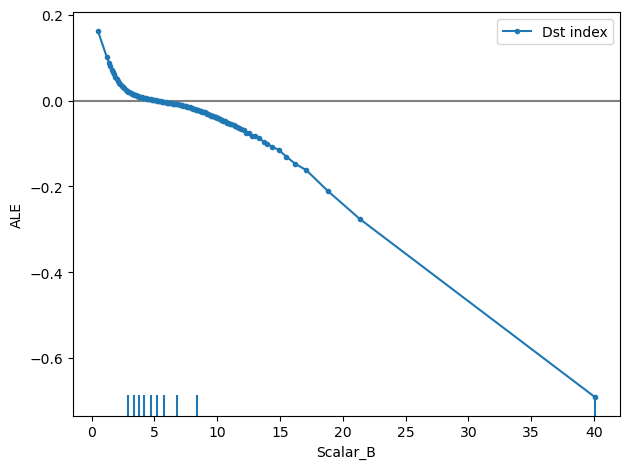

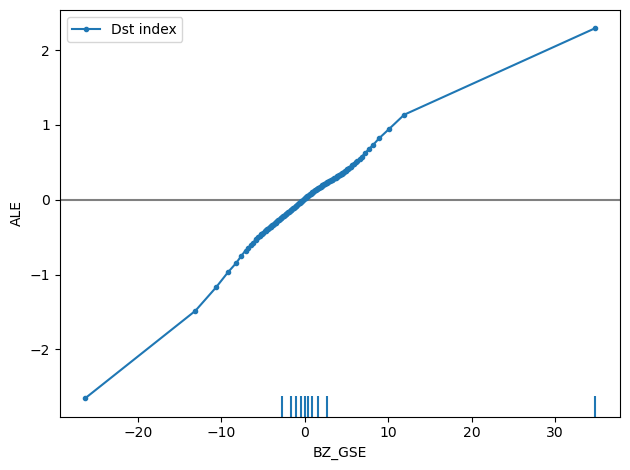

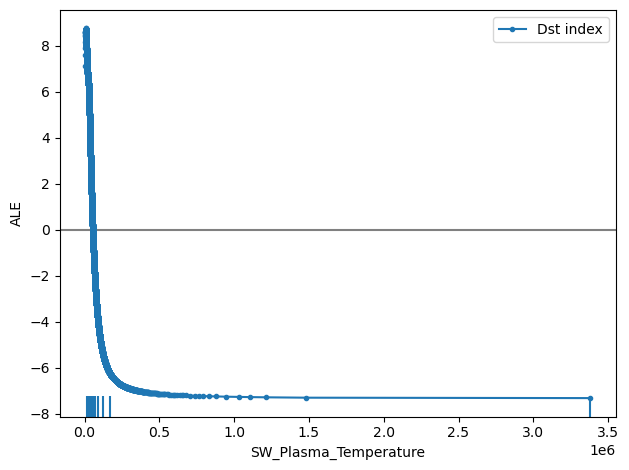

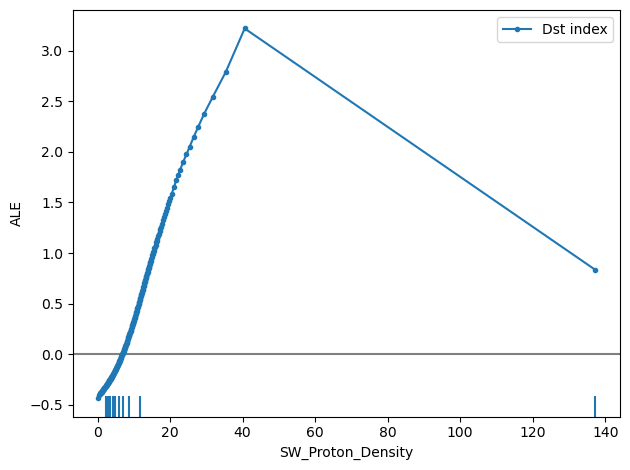

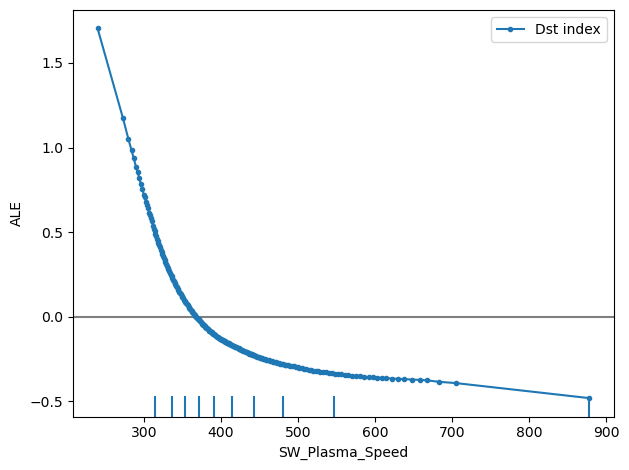

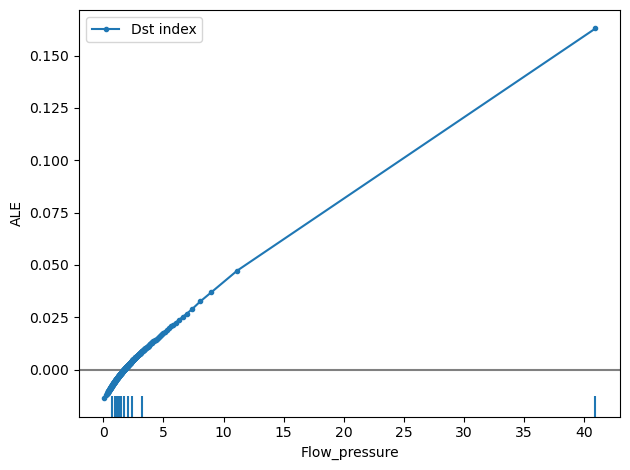

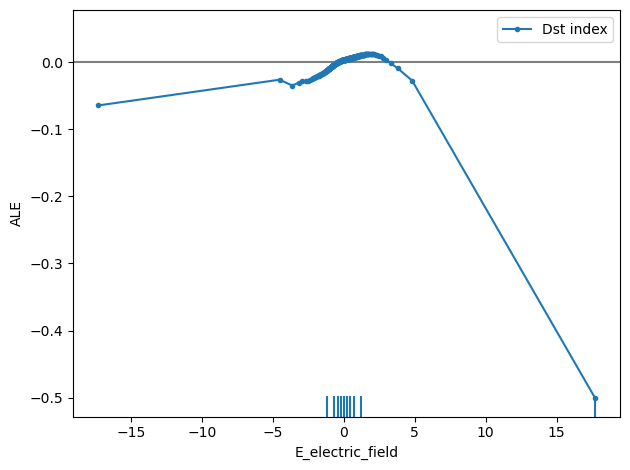

In [8]:
for k in range(7):
    plot_ale(ale_exp, features = [columns_names[k]]);

1/1 [==============================] - 10s 10s/step


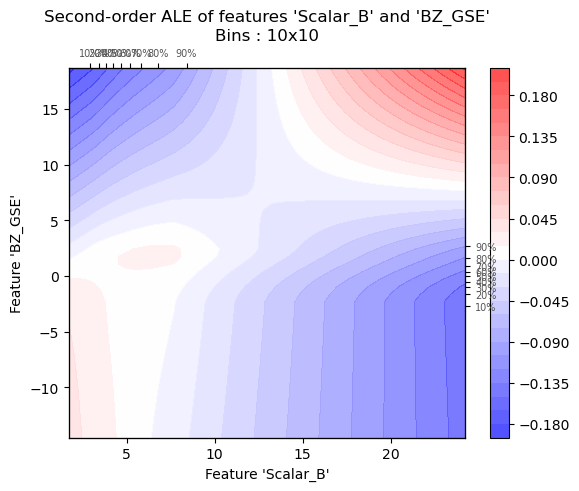

1/1 [==============================] - 10s 10s/step


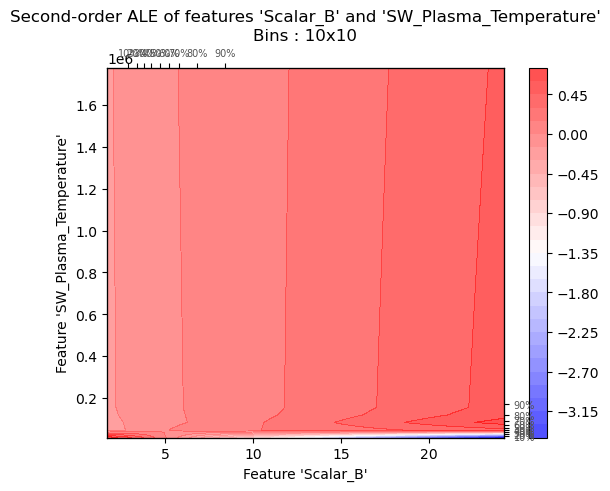

1/1 [==============================] - 10s 10s/step


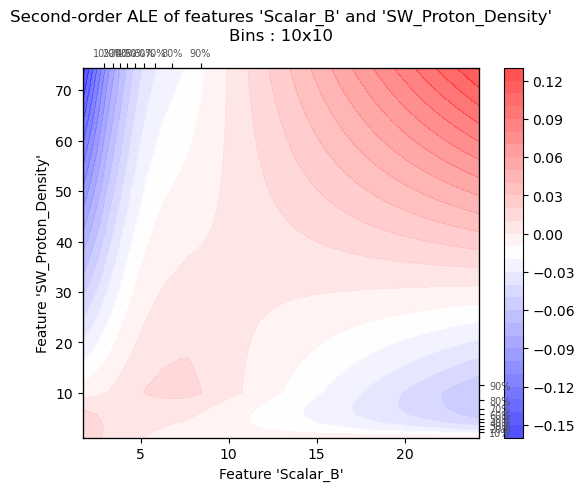

1/1 [==============================] - 8s 8s/step


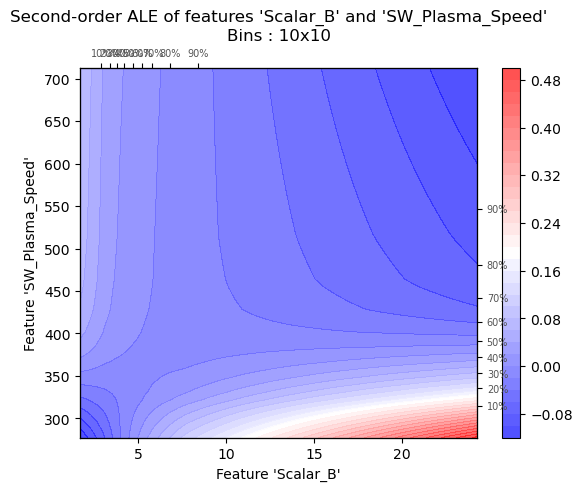

1/1 [==============================] - 15s 15s/step


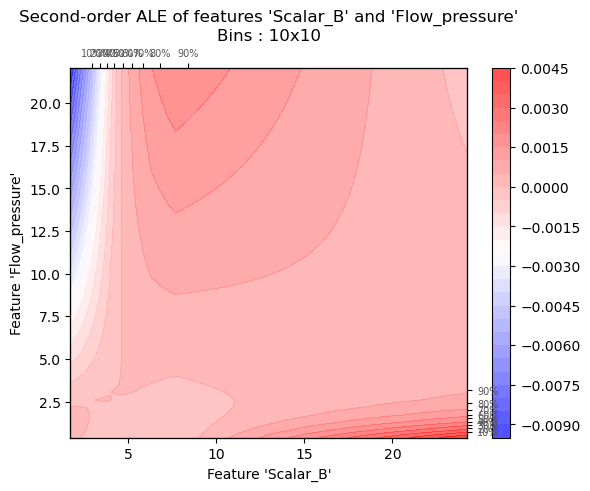

1/1 [==============================] - 8s 8s/step


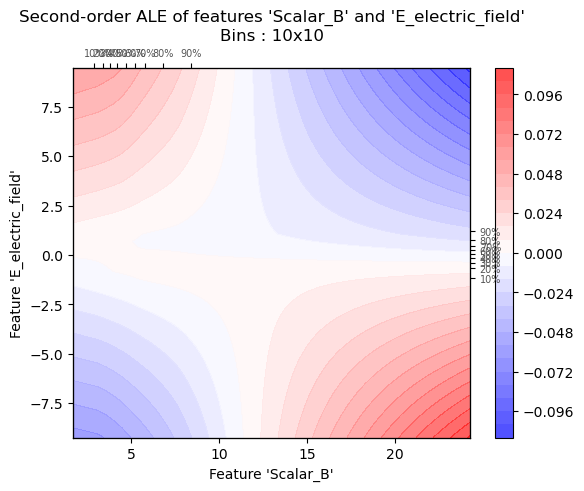

1/1 [==============================] - 10s 10s/step


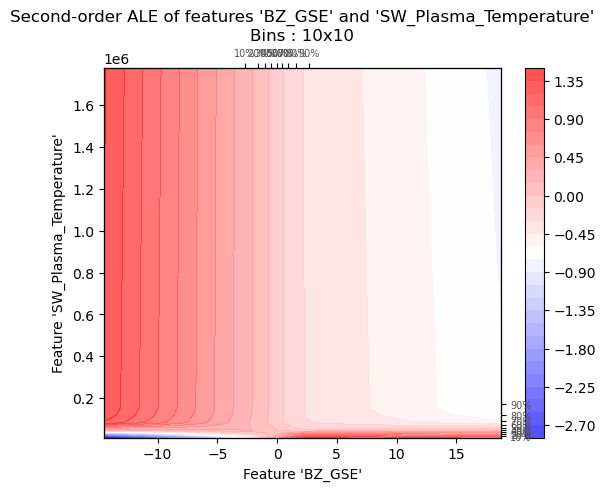

1/1 [==============================] - 13s 13s/step


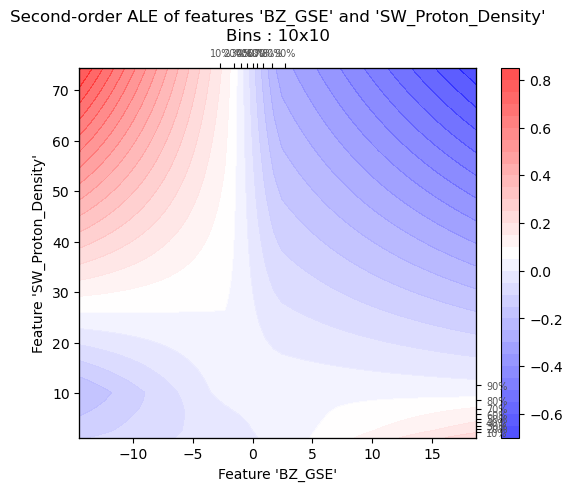

1/1 [==============================] - 17s 17s/step


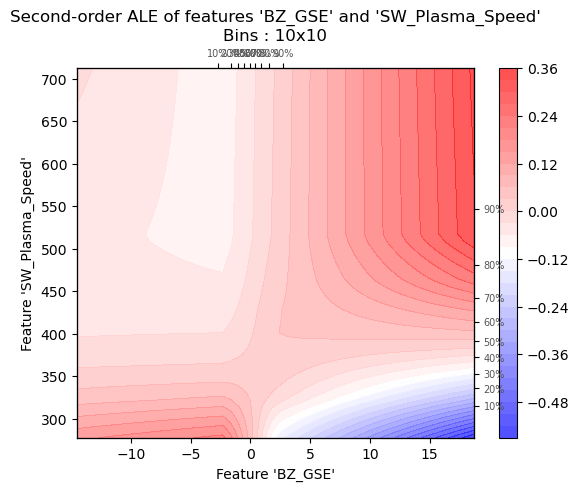

1/1 [==============================] - 14s 14s/step


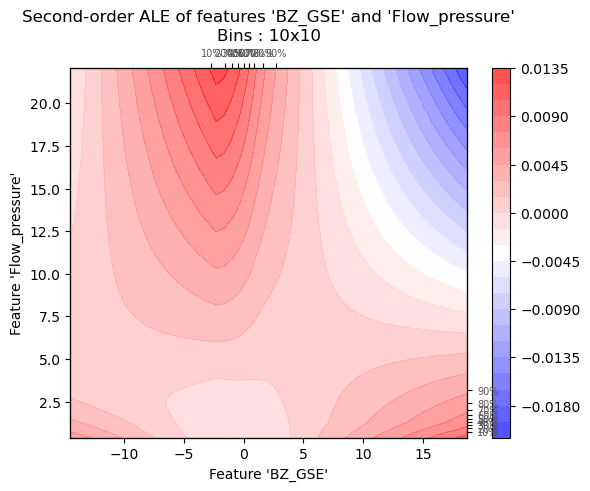

1/1 [==============================] - 14s 14s/step


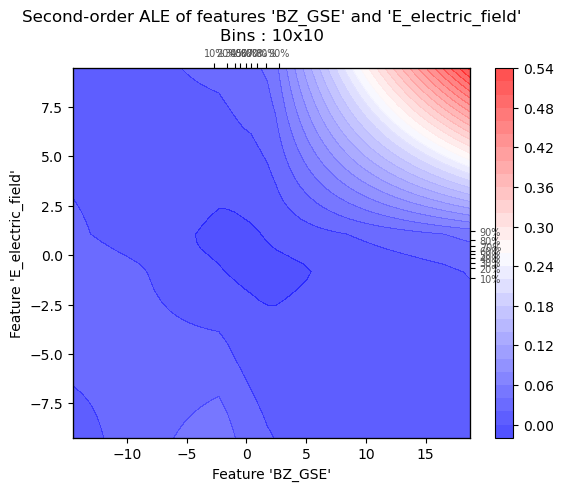

1/1 [==============================] - 18s 18s/step


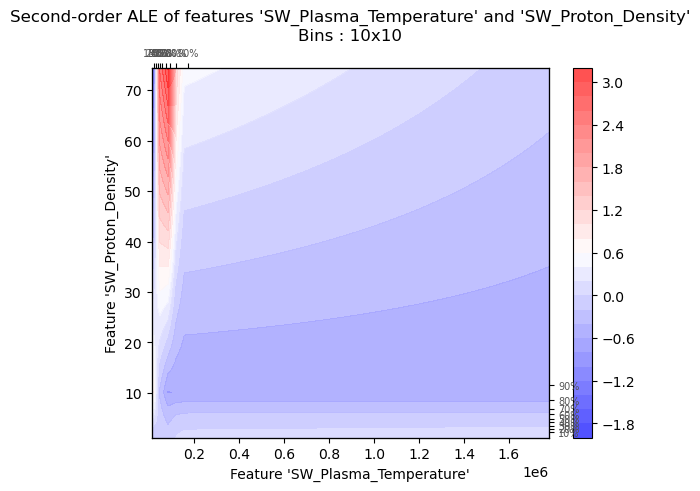

1/1 [==============================] - 16s 16s/step


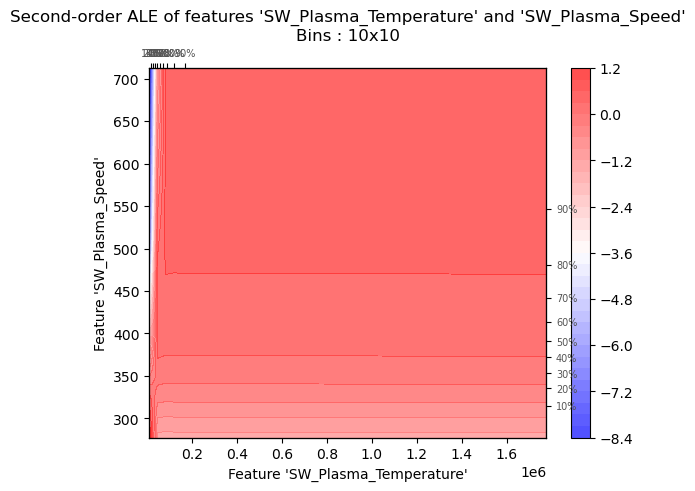

1/1 [==============================] - 13s 13s/step


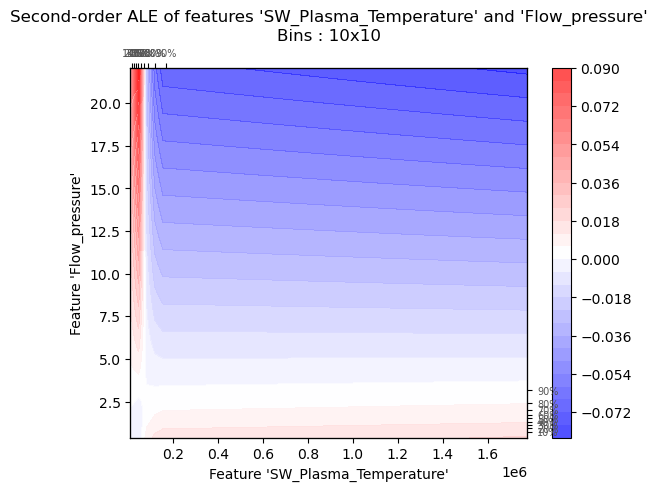

1/1 [==============================] - 15s 15s/step


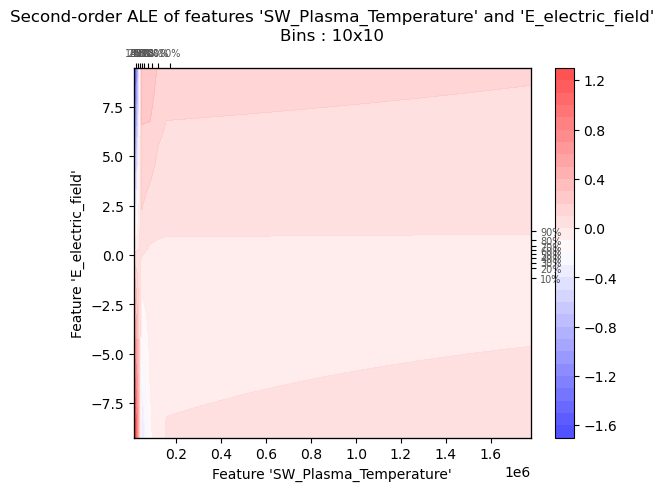

1/1 [==============================] - 14s 14s/step


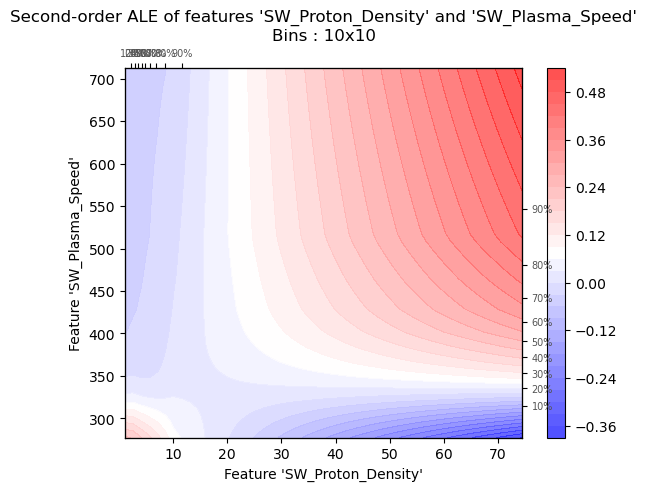

1/1 [==============================] - 16s 16s/step


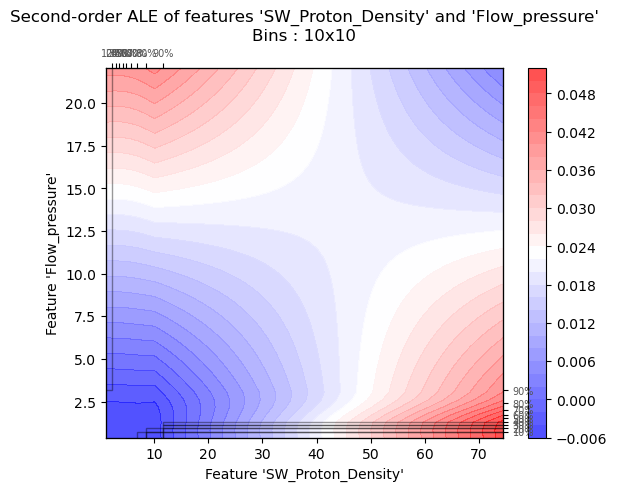

1/1 [==============================] - 13s 13s/step


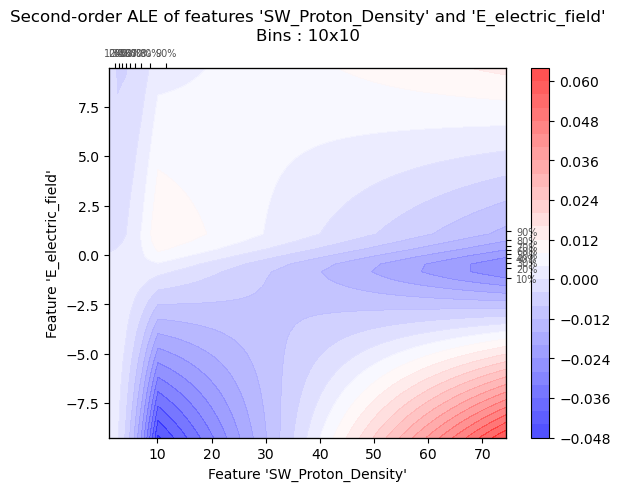

1/1 [==============================] - 13s 13s/step


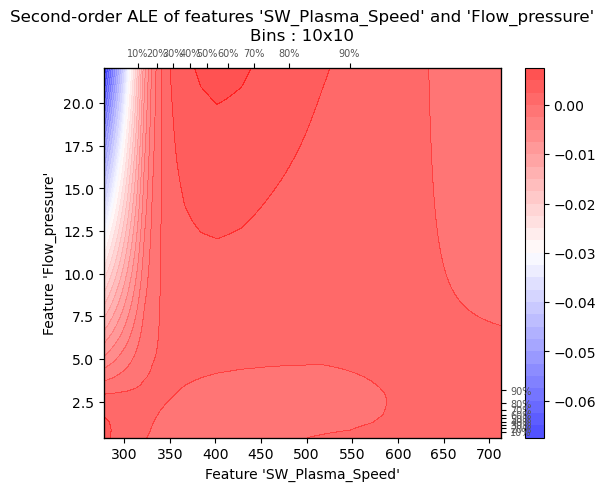

1/1 [==============================] - 11s 11s/step


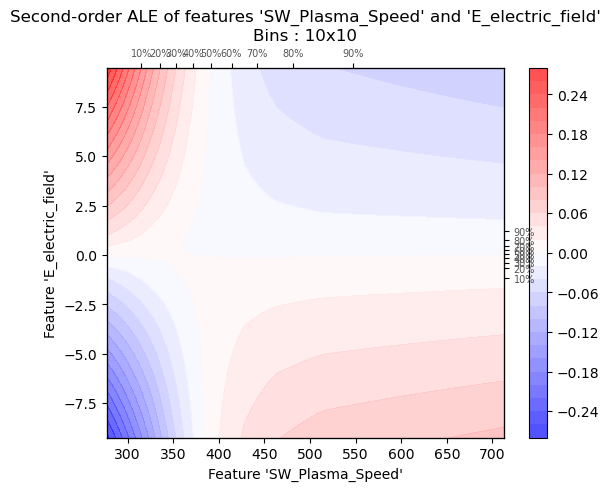

1/1 [==============================] - 14s 14s/step


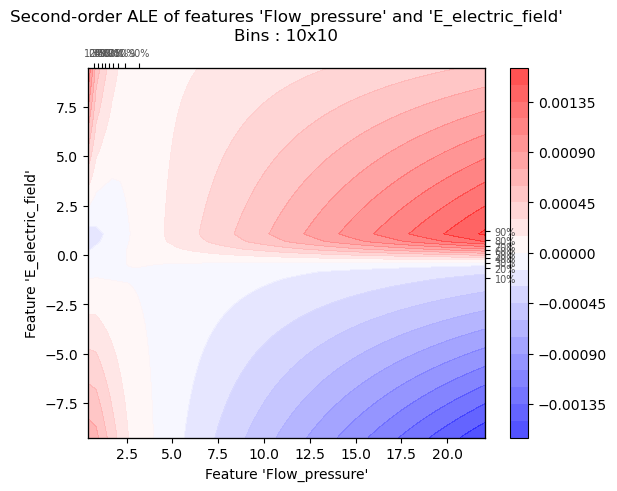

In [9]:
import matplotlib as mpl
from loguru import logger
from alepython import ale_plot

for i in range(6):
    for j in range(i+1,7):
        ale_plot(model11, trainx_df, [columns_names[i], columns_names[j]], bins=10, monte_carlo=True)